In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

Using TensorFlow backend.


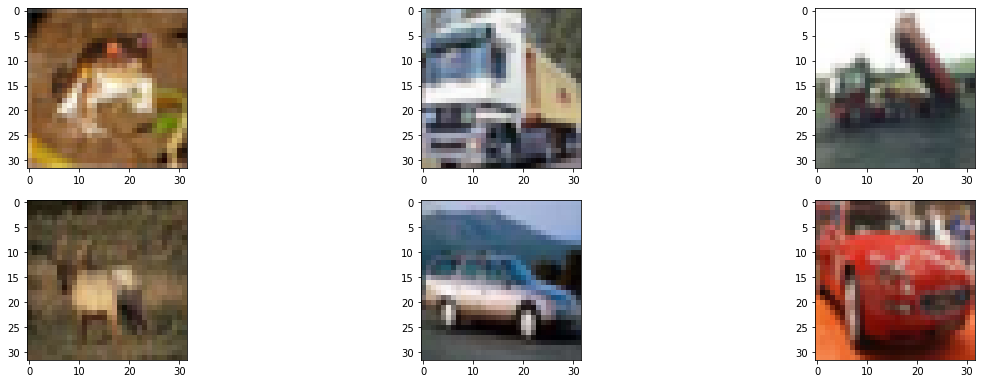

In [2]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [5]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [6]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [9]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 181s 116ms/step - loss: 1.7096 - accuracy: 0.3771 - val_loss: 1.4248 - val_accuracy: 0.4822
Epoch 2/10
1563/1563 [==============================] - 182s 116ms/step - loss: 1.3780 - accuracy: 0.5055 - val_loss: 1.2636 - val_accuracy: 0.5450
Epoch 3/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.2190 - accuracy: 0.5602 - val_loss: 1.1505 - val_accuracy: 0.5951
Epoch 4/10
1563/1563 [==============================] - 185s 119ms/step - loss: 1.0888 - accuracy: 0.6137 - val_loss: 1.0832 - val_accuracy: 0.6176
Epoch 5/10
1563/1563 [==============================] - 178s 114ms/step - loss: 0.9812 - accuracy: 0.6493 - val_loss: 1.0100 - val_accuracy: 0.6455
Epoch 6/10
1563/1563 [==============================] - 177s 113ms/step - loss: 0.8994 - accuracy: 0.6829 - val_loss: 0.9598 - val_accuracy: 0.6599
Epoch 7/10
1563/1563 [==============================] - 177s 113ms/step - loss: 0.8281 - accuracy: 0.7068 - val_

In [10]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 4s 13ms/step - loss: 0.9138 - accuracy: 0.6846
68.45999956130981


In [11]:
model.save("model1_cifar_10epoch.h5")

In [12]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("../documents/input/CIFAR test/truck.png")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

FileNotFoundError: [Errno 2] No such file or directory: '../documents/input/CIFAR test/truck.png'